# Simple Linear Regression

In [6]:
# import basic libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid', which adds a dark grid to the background of plots.

%matplotlib inline 
# This line should be used in Jupyter notebooks to display matplotlib plots inline (within the notebook).

In [9]:
# load the dataset 
original_data = pd.read_csv('../Data/Student_Marks.csv')

# make a copy of the original data ( make a deep copy)
model_data = original_data.copy()

# let us see the top 5 rows of the data 
model_data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## Description of the dataset columns 
>**number_courses** : Number of Courses Opted by the student<br/>
**time_study** : Average Time Studied per day by the student<br/>
**Marks** : Marks Obtained by the student

## Dropping a Columns
>Since I am performing a Simple Linear Regression on the above dataset, it is sufficient to have a single explanatory variable. Thus, I drop the `number_courses` column from the dataset.

In [10]:
# let us first see the names of the columns 
model_data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [11]:
# let us drop the column - number_courses - fom the dataframe 
model_data.drop(
    labels = model_data.columns[0],
    axis = 1, 
    inplace = True
)

model_data.head()


,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


## Information about the dataset

In [12]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


So, there are no null values to handle in the dataset. The dataset is clean!


In [15]:
# let us get info about the descriptive statistics of the variables 
model_data.describe().T

,count,mean,std,min,25%,50%,75%,max
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


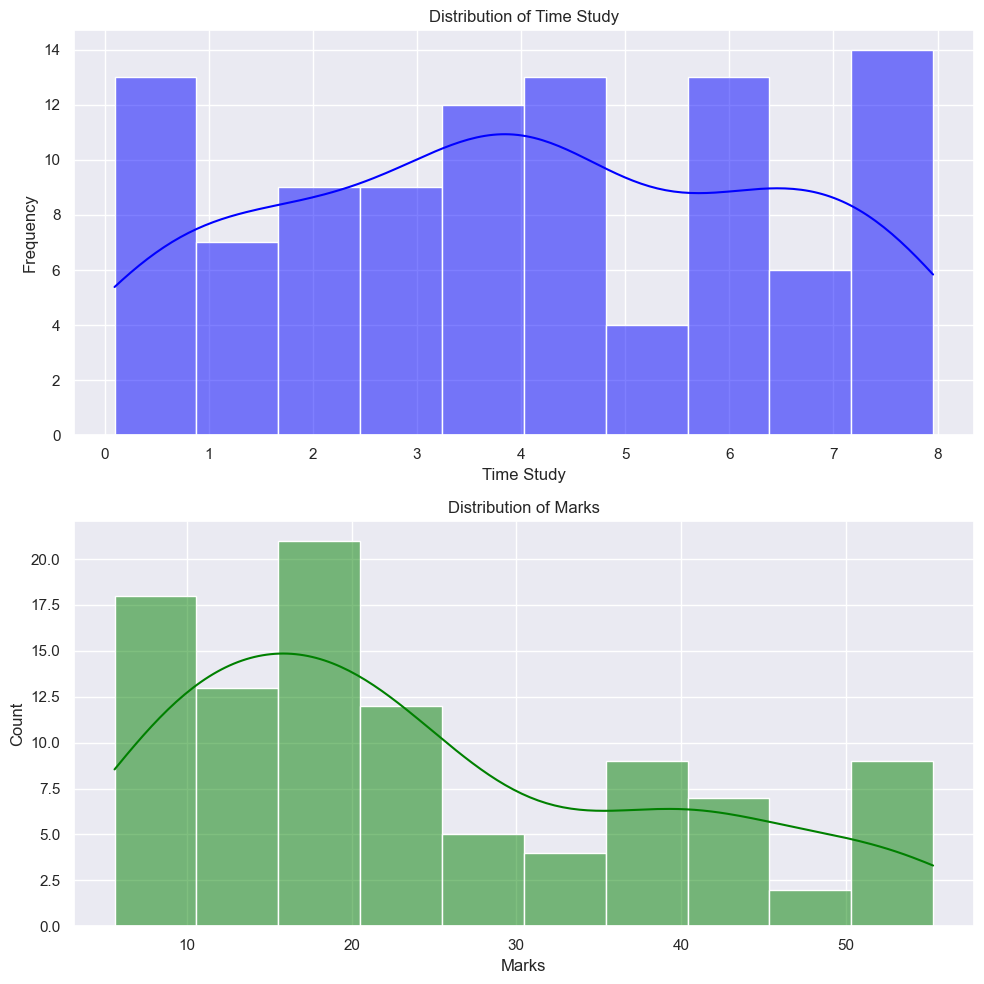

In [30]:
# let us plot the variables 
fig, axes = plt.subplots(2, 1, figsize=(10,10))

sns.histplot(model_data['time_study'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Time Study')
axes[0].set_xlabel('Time Study')
axes[0].set_ylabel('Frequency')

# Plot histogram for "Marks"
sns.histplot(model_data['Marks'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Marks')
axes[1].set_xlabel('Marks')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Based on the histograms provided for the `time_study` and `Marks` distributions:

1. **Distribution of `time_study`**:
   - The data appears somewhat uniform, with no strong central peak or evident skew.
   - The KDE curve shows a slight increase in density around 3–5, suggesting that these values occur more frequently, but the distribution overall is fairly flat.
   - This might indicate that `time_study` values are spread out relatively evenly across the range.

2. **Distribution of `Marks`**:
   - The data shows a slight left skew, with higher frequencies observed in the lower range (e.g., 10–20).
   - The KDE curve highlights a peak around 15–20, suggesting that many students scored in this range, with the frequency tapering off as the marks increase.
   - This could indicate that most students performed modestly, with fewer high scorers.

### Insights:
- The `time_study` distribution does not appear to have a strong relationship with the shape of the `Marks` distribution at a glance, suggesting the need for further analysis, such as scatter plots or regression, to check for potential correlations or patterns.

## Create a Baseline Model 

Let us now create a `BASELINE MODEL` with the target mean i.e. use the mean of the `Marks` column to predict the target variable irrespective of the value the explanatolry vriable , `time_study` takes. Next we calculate the Sum of Squared Errors (SSE) for comparison purpose.


The target mean is : 24.417689999999997


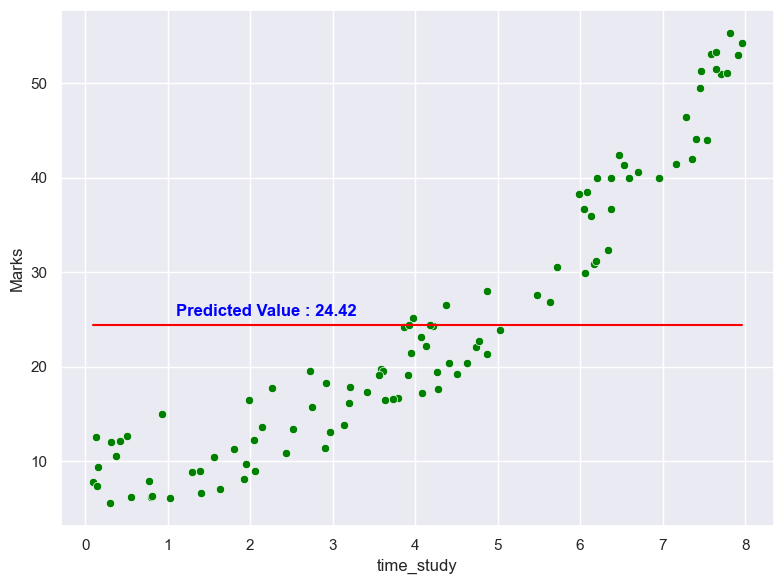

In [44]:
# first let us calculate the mean of the target 
mean_marks = np.mean(model_data['Marks'])
print(f"The target mean is : {mean_marks}")

# let us now see the prediction in a diagram 
fig, axes = plt.subplots(figsize=(8,6))
sns.scatterplot(data=model_data,
                x = model_data['time_study'],
                y = model_data['Marks'],
                ax = axes , 
                color = 'green')
sns.lineplot(data=model_data,
             x = model_data['time_study'],
             y = mean_marks,
             ax = axes, 
             color = 'red')
# let us annotate the line 
axes.text(x = np.min(model_data['time_study'])++1,
          y = mean_marks+1,
          s = f"Predicted Value : {mean_marks:.2f}",
          color = 'blue',
          fontsize = 12, 
          fontweight = 'bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

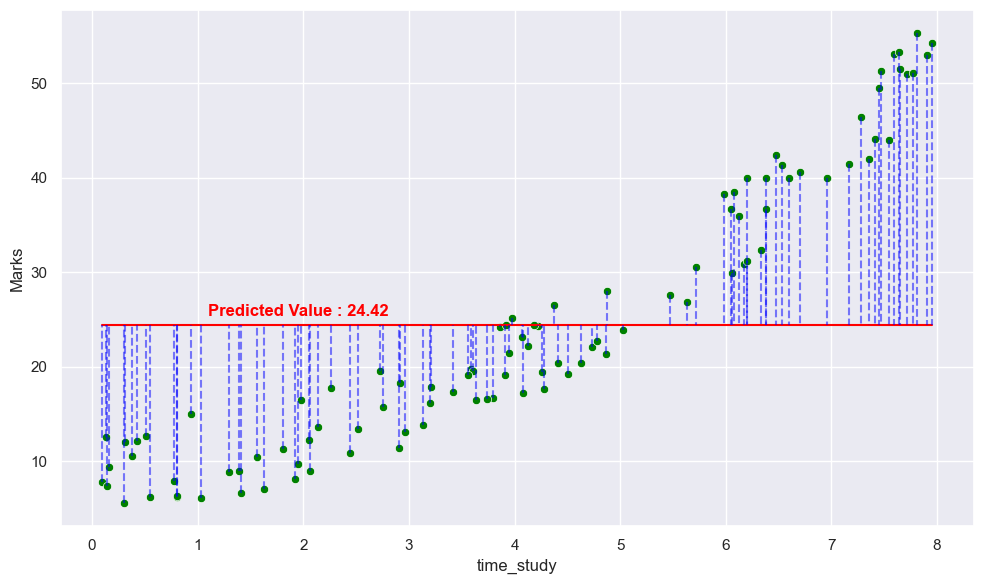

In [ ]:
# let us now visualize the SSE and calculate them 

fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=model_data,
                x = model_data['time_study'],
                y = model_data['Marks'],
                ax = axes , 
                color = 'green')
sns.lineplot(data=model_data,
             x = model_data['time_study'],
             y = mean_marks,
             ax = axes, 
             color = 'red')

# Add vertical lines for errors
for _, row in model_data.iterrows():
    axes.plot([row['time_study'], row['time_study']],  # x-coordinates (fixed for each point)
            [row['Marks'], mean_marks],             # y-coordinates (actual to predicted)
            color='blue', linestyle='--', alpha=0.5)
    
# let us annotate the line 
axes.text(x = np.min(model_data['time_study'])++1,
          y = mean_marks+1,
          s = f"Predicted Value : {mean_marks:.2f}",
          color = 'red',
          fontsize = 12, 
          fontweight = 'bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [57]:
# calculate SSE 

error = model_data['Marks'] - mean_marks
SSE = np.sum(
    np.power(
        error,2
    )
)

print(f"The SSE of the Baseline Model is : {SSE}")

The SSE of the Baseline Model is : 20318.756583389997


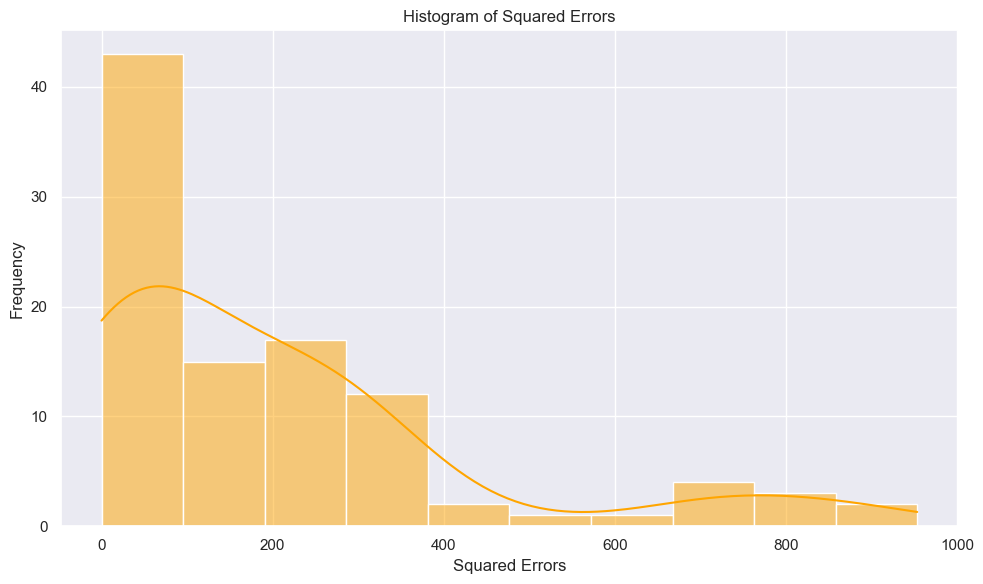

In [68]:
# let us now visualize the distribution of the squared errors 

squared_errors = np.power(error, 2)

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(
    squared_errors,
    bins = 10, 
    color = 'orange',
    kde = True,
    ax = ax
)

ax.set_xlabel('Squared Errors')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Squared Errors')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show plot
plt.show()

Thus, it is visible that there a large number of squared errors is actually between 0 and 100. This means, that the mean is not that bad a predictor! However, we also see that there exists squared errors which are quite large and these errors make the SSE large! 

So, we have some room for improvement of the Baseline model that we have created.

## Problem with the Baseline Model and its Remedy

In the Baseline Model, our prediction is actually the mean of the target variable. Thus our prediction of a changing target variable is nothing but a constant! This seems ABSURD since a CONSTANT CAN'T BE A GOOD PREDICTOR FOR A CHANGING TARGET!

What we need is a **target mean that is not fixed but is dependent on values of another variable which is related to the target** i.e. the variation in that variable is somewhere similar to that of the target.

In [77]:
# let us observe the correlation between the two variables we have 

def Covariance(x,y,bias=0): # calculates the covaraince between two variables 
    n_samples = float(x.size)
    x_mean , y_mean = np.mean(x), np.mean(y)
    cov = np.sum((x-x_mean)*(y-y_mean))/(n_samples - min(bias,1))
    return cov
    
def Standardized(x): # standardize any variable 
    x_mean = np.mean(x)
    x_std = np.std(x)
    return (x-x_mean)/x_std

def Correlation(x,y,bias=0): # calculates the correlation between the two variables 
    return Covariance(Standardized(x),
                      Standardized(y),
                      bias)

x = model_data['time_study']
y = model_data['Marks']
print(f'The correlation between time_study and Marks is : {Correlation(x,y)}')

The correlation between time_study and Marks is : 0.9422538903640542


In [79]:
# this is actually, the perason correlation coeff

from scipy.stats import pearsonr

# pearson corr coeff. 

x = model_data['time_study']
y = model_data['Marks']

pearsonr(
    x,
    y
)

PearsonRResult(statistic=np.float64(0.9422538903640539), pvalue=np.float64(2.355657179844169e-48))

So, we see that the variables `time_study` and `Marks` have a strong linear 